# 1. Combined Cycle Power Plant Data Set

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [5]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx',names=['AT','V','AP','RH','EP'],sheet_name='Sheet1')
df

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


(b)i There are 9568 rows and 5 columns. The rows represents data collected under different features condition.
The first four columns represent features. The last column those features' results.

(b)ii scatterplot

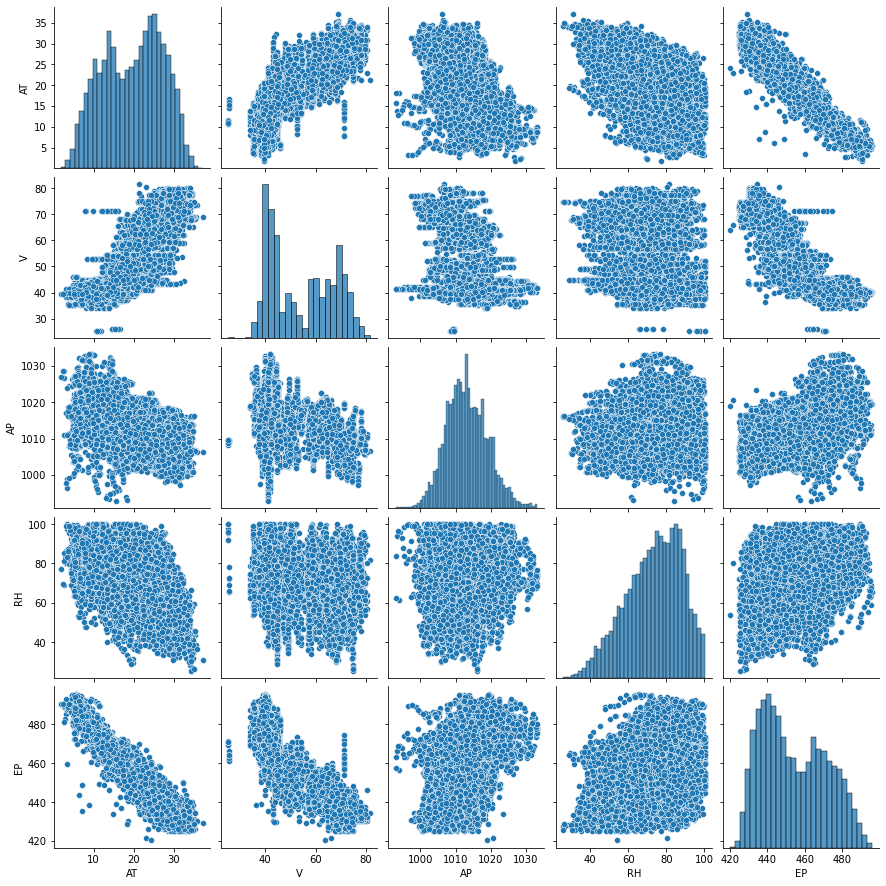

In [237]:
sns.pairplot(df)

From the graph, we can see that AT(Temperature) and V(Exhaust Vacuum) have some linear relationship
with EP(net hourly electrical energy output). I could see the linear trend through AT vs. EP or V vs. EP

(b)iii. What are the mean, the median, range, first and third quartiles, and in- terquartile 
ranges of each of the variables in the dataset? Summarize them in a table.

In [238]:
des = df.describe()
#print(des)
range_seg = []
interq = []
for a in ['AT','V','AP','RH','EP']:
    ran = des[a]['max'] - des[a]['min']
    range_seg.append(ran)
    inter = des[a]['75%'] - des[a]['25%']
    interq.append(inter)
#des['AT']['50%']

range_seg = pd.DataFrame(range_seg,columns=['range'])
interq = pd.DataFrame(interq,columns=['inter_quartile'])
range_segt = range_seg.T
interqt = interq.T
range_segt.columns = ['AT','V','AP','RH','EP']
interqt.columns = ['AT','V','AP','RH','EP']

total = pd.concat([des,range_segt],axis=0)
total1 = pd.concat([total,interqt],axis=0)
print(total1)

                         AT            V           AP           RH  \
count           9568.000000  9568.000000  9568.000000  9568.000000   
mean              19.651231    54.305804  1013.259078    73.308978   
std                7.452473    12.707893     5.938784    14.600269   
min                1.810000    25.360000   992.890000    25.560000   
25%               13.510000    41.740000  1009.100000    63.327500   
50%               20.345000    52.080000  1012.940000    74.975000   
75%               25.720000    66.540000  1017.260000    84.830000   
max               37.110000    81.560000  1033.300000   100.160000   
range             35.300000    56.200000    40.410000    74.600000   
inter_quartile    12.210000    24.800000     8.160000    21.502500   

                         EP  
count           9568.000000  
mean             454.365009  
std               17.066995  
min              420.260000  
25%              439.750000  
50%              451.550000  
75%              46

(c)For each predictor, fit a simple linear regression model to predict the response

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:15   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

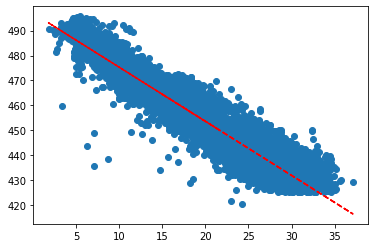

In [239]:
#AT vs. EP
x_data = df['AT']
y_data = df['EP']
x_data_1 = sm.add_constant(x_data)
model = sm.OLS(y_data,x_data_1).fit()
coef_at = model.params[1] #constant
print(model.summary())
plt.scatter(x_data,y_data)
z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,p(x_data),"r--")
plt.show()

Since p-value is less than 0.05, it means the effect of this feature is significant. 
The plot can also show that there is a significant relationship between AT and EP

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:15   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

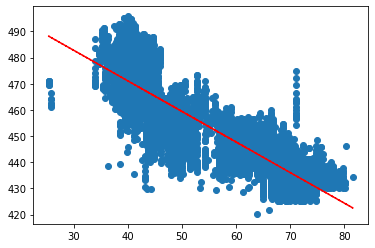

In [240]:
#V vs. EP
x_data = df['V']
y_data = df['EP']
x_data_1 = sm.add_constant(x_data)
model = sm.OLS(y_data,x_data_1).fit()
coef_v = model.params[1]
print(model.summary())
plt.scatter(x_data,y_data)
z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,p(x_data),"r--")
plt.show()

Since p-value is less than 0.05, it means the effect of this feature is significant. 
The plot can also show that there is a significant relationship between V and EP

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:16   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

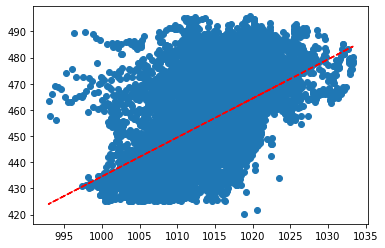

In [241]:
#AP vs. EP
x_data = df['AP']
y_data = df['EP']
x_data_1 = sm.add_constant(x_data)
model = sm.OLS(y_data,x_data_1).fit()
coef_ap = model.params[1]
print(model.summary())
plt.scatter(x_data,y_data)
z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,p(x_data),"r--")
plt.show()

Since p-value is less than 0.05, it means the effect of this feature is significant. 
The plot can also show that there is a linear relationship between AP and EP.
However, the r-squared value is only 0.269, which means that the independent variable (AP) is not explaining much in the variation of dependent variable(EP)

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:16   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

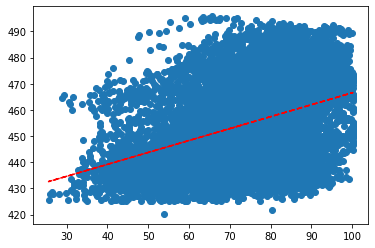

In [242]:
#RH vs. EP
x_data = df['RH']
y_data = df['EP']
x_data_1 = sm.add_constant(x_data)
model = sm.OLS(y_data,x_data_1).fit()
coef_rh = model.params[1]
print(model.summary())
plt.scatter(x_data,y_data)
z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
plt.plot(x_data,p(x_data),"r--")
plt.show()

Since p-value is less than 0.05, it means the effect of this feature is significant. 
The plot can also show that there is a linear relationship between RH and EP. 
However, the r-squared value is only 0.269, which means that the independent 
variable (RH) is not explaining much in the variation of dependent variable(EP)

<AxesSubplot:>

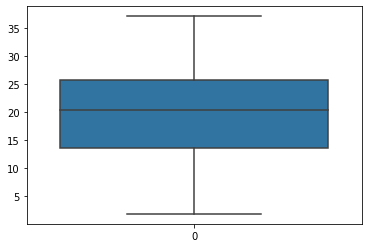

In [243]:
#outlier:
sns.boxplot(data=df['AT'])

No outliers in AT predictor.

<AxesSubplot:>

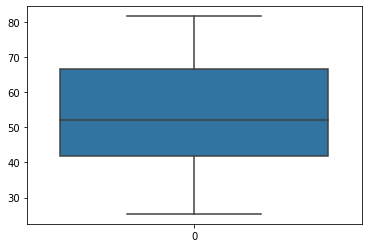

In [244]:
sns.boxplot(data=df['V'])

No outliers in V predictor.

The number ot outliers:  307


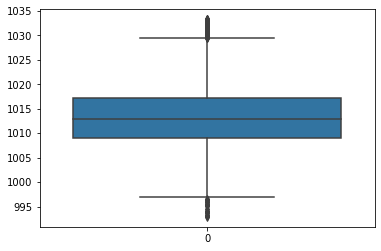

In [25]:
sns.boxplot(data=df['AP'])
a = np.where(df['AP']>1030)
b = np.where(df['AP']<1000)
a = np.asarray(a)
a = a.flatten() ##Convert a tuple of lists into array
b = np.asarray(b)
b = b.flatten() #Convert a tuple of lists into array
c = a[0] + b[0]
print('The number ot outliers: ', c)

There are several outliers for AP predictor

The number ot outliers:  89


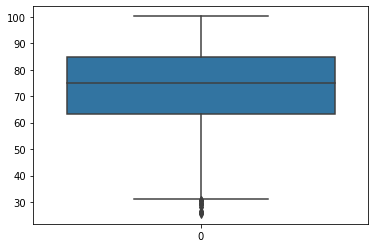

In [27]:
sns.boxplot(data=df['RH'])

a = np.where(df['RH']<40)
a = np.asarray(a)
a = a.flatten() ##Convert a tuple of lists into array
print('The number ot outliers: ', a[0])

There are several outliers for RH predictor

(d)Fit a multiple regression model to predict the response using all of the predictors

In [247]:
x_data = df[['AT','V','AP','RH']]
y_data = df['EP']
x_data_1 = sm.add_constant(x_data)
model = sm.OLS(y_data,x_data_1).fit()
comb_coef_at = model.params[1]
comb_coef_v = model.params[2]
comb_coef_ap = model.params[3]
comb_coef_rh = model.params[4]
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:17   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

The p-values for each feature are all less than 0.05 which means all the null hypothesis can be rejected.

(e)Create a plot displaying the univariate regression coefficients from 1c on the x-axis, 
and the multiple regression coefficients from 1d on the y-axis

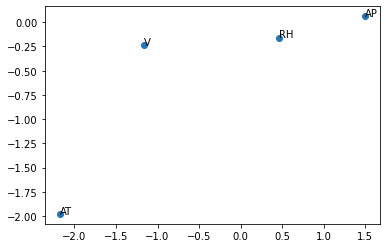

In [248]:
coef_total = []
coef_total.append(coef_at)
coef_total.append(coef_v)
coef_total.append(coef_ap)
coef_total.append(coef_rh)
comb_coef_total = []
comb_coef_total.append(comb_coef_at)
comb_coef_total.append(comb_coef_v)
comb_coef_total.append(comb_coef_ap)
comb_coef_total.append(comb_coef_rh)
x_data = coef_total
y_data = comb_coef_total
feature = ['AT','V','AP','RH']
plt.scatter(x_data,y_data)
for a in range(0,len(x_data),1):
    plt.annotate(feature[a],(x_data[a],y_data[a]))

(f)Is there evidence of nonlinear association between any of the predictors and the response?
each predictor X, fit a model of the form

In [249]:
#AT
x_data = df[['AT']]
poly = PolynomialFeatures(degree=3) #transform into polynonmial
x_poly = poly.fit_transform(x_data)
print(x_poly)
x_data = pd.DataFrame(x_poly)
y_data = df['EP']
model = sm.OLS(y_data,x_data).fit()
print(model.summary())

[[1.00000000e+00 1.49600000e+01 2.23801600e+02 3.34807194e+03]
 [1.00000000e+00 2.51800000e+01 6.34032400e+02 1.59649358e+04]
 [1.00000000e+00 5.11000000e+00 2.61121000e+01 1.33432831e+02]
 ...
 [1.00000000e+00 3.13200000e+01 9.80942400e+02 3.07231160e+04]
 [1.00000000e+00 2.44800000e+01 5.99270400e+02 1.46701394e+04]
 [1.00000000e+00 2.16000000e+01 4.66560000e+02 1.00776960e+04]]
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:18   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                   

The R-squared is 0.912, which means that the independent variable (AT) is 
explaining well in the variation of dependent variable(EP) and also for the p-values, 
they are small which has significant effect. 
Therefore, this is the evidence of nonlinear association.

In [250]:
#V
x_data = df[['V']]
poly = PolynomialFeatures(degree=3) #transform into polynonmial
x_poly = poly.fit_transform(x_data)
print(x_poly)
x_data = pd.DataFrame(x_poly)
y_data = df['EP']
model = sm.OLS(y_data,x_data).fit()
print(model.summary())

[[1.00000000e+00 4.17600000e+01 1.74389760e+03 7.28251638e+04]
 [1.00000000e+00 6.29600000e+01 3.96396160e+03 2.49571022e+05]
 [1.00000000e+00 3.94000000e+01 1.55236000e+03 6.11629840e+04]
 ...
 [1.00000000e+00 7.43300000e+01 5.52494890e+03 4.10669452e+05]
 [1.00000000e+00 6.94500000e+01 4.82330250e+03 3.34978359e+05]
 [1.00000000e+00 6.25200000e+01 3.90875040e+03 2.44375075e+05]]
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:18   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                   

The R-squared is 0.775, which means that the independent variable (V) is 
explaining some relationship in the variation of dependent variable(EP). 
The second degree has a very large p-value. But the rest of degrees' p-values are small enough.
Therefore, there is some evidence to prove nonlinear association between 
the changes in the independent variable(V) and the shifts in the dependent variable(EP)

In [251]:
#AP
x_data = df[['AP']]
poly = PolynomialFeatures(degree=3) #transform into polynonmial
x_poly = poly.fit_transform(x_data)
print(x_poly)
x_data = pd.DataFrame(x_poly)
y_data = df['EP']
model = sm.OLS(y_data,x_data).fit()
print(model.summary())

[[1.00000000e+00 1.02407000e+03 1.04871936e+06 1.07396204e+09]
 [1.00000000e+00 1.02004000e+03 1.04048160e+06 1.06133285e+09]
 [1.00000000e+00 1.01216000e+03 1.02446787e+06 1.03692539e+09]
 ...
 [1.00000000e+00 1.01292000e+03 1.02600693e+06 1.03926294e+09]
 [1.00000000e+00 1.01386000e+03 1.02791210e+06 1.04215896e+09]
 [1.00000000e+00 1.01723000e+03 1.03475687e+06 1.05258573e+09]]
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:18   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                   

The R-squared is 0.275, which means that the independent variable (AP) is not explaining well in
the variation of dependent variable(EP). As for the p-values, 
they are all small enough to prove AP predictor has significant effect.  Therefore, there is some evidence to prove nonlinear association between the changes in the independent variable(AP) and the shifts in the dependent variable(EP)

In [252]:
#RH
x_data = df[['RH']]
poly = PolynomialFeatures(degree=3) #transform into polynonmial
x_poly = poly.fit_transform(x_data)
print(x_poly)
x_data = pd.DataFrame(x_poly)
y_data = df['EP']
model = sm.OLS(y_data,x_data).fit()
print(model.summary())

[[1.00000000e+00 7.31700000e+01 5.35384890e+03 3.91741124e+05]
 [1.00000000e+00 5.90800000e+01 3.49044640e+03 2.06215573e+05]
 [1.00000000e+00 9.21400000e+01 8.48977960e+03 7.82248292e+05]
 ...
 [1.00000000e+00 3.64800000e+01 1.33079040e+03 4.85472338e+04]
 [1.00000000e+00 6.23900000e+01 3.89251210e+03 2.42853830e+05]
 [1.00000000e+00 6.78700000e+01 4.60633690e+03 3.12632085e+05]]
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:18   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                   

The R-squared is 0.153, which means that the independent variable (RH) is not explaining well 
in the variation of dependent variable(EP). As for the p-values, they are all small enough 
to prove RH predictor has significant effect. Therefore, there is some evidence to prove 
nonlinear association between the changes in the independent variable(RH) and the shifts 
in the dependent variable(EP)

(g)Is there evidence of association of interactions of predictors with the response? pairwise

In [253]:
x_data = df[['AT','V','AP','RH']]
poly = PolynomialFeatures(interaction_only=True)
x_poly = poly.fit_transform(x_data)
x_data = pd.DataFrame(x_poly,columns=['cons','AT','V','AP','RH','AT_V','AT_AP','AT_RH','V_AP','V_RH','AP_RH'])
print(x_poly)
y_data = df['EP']
model = sm.OLS(y_data,x_data).fit()
print(model.summary())

[[1.00000000e+00 1.49600000e+01 4.17600000e+01 ... 4.27651632e+04
  3.05557920e+03 7.49312019e+04]
 [1.00000000e+00 2.51800000e+01 6.29600000e+01 ... 6.42217184e+04
  3.71967680e+03 6.02639632e+04]
 [1.00000000e+00 5.11000000e+00 3.94000000e+01 ... 3.98791040e+04
  3.63031600e+03 9.32604224e+04]
 ...
 [1.00000000e+00 3.13200000e+01 7.43300000e+01 ... 7.52903436e+04
  2.71155840e+03 3.69513216e+04]
 [1.00000000e+00 2.44800000e+01 6.94500000e+01 ... 7.04125770e+04
  4.33298550e+03 6.32547254e+04]
 [1.00000000e+00 2.16000000e+01 6.25200000e+01 ... 6.35972196e+04
  4.24323240e+03 6.90394001e+04]]
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:

The interaction of AT_V,AT_RH,V_AP and AP_RH are statistically significant.

(h)Train the regression model on a randomly selected 70% subset of the data with all predictors. 
Also, run a regres- sion model involving all possible interaction terms and quadratic nonlinearities, 
and remove insignificant variables using p-values

In [254]:
x_train,x_test,y_train,y_test = train_test_split(df[['AT','V','AP','RH']],df['EP'],test_size=0.3,train_size=0.7,
                                                random_state=1)
x_train.reset_index(inplace=True,drop=True)
x_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)
#linear regression
#x_train_1 = sm.add_constant(x_train)
#model = sm.OLS(y_train,x_train_1).fit()
#coef_rh = model.params[1]
#print(model.summary())
lr_train = LinearRegression()
lr_train.fit(x_train,y_train)
train_score = lr_train.score(x_train,y_train)
test_score = lr_train.score(x_test,y_test)
print('training score is: ', train_score) #r_squared
print('testing score is: ',test_score) #r_squared
y_train_pred = lr_train.predict(x_train)
y_test_pred = lr_train.predict(x_test)
train_error = mean_squared_error(y_train,y_train_pred)
test_error = mean_squared_error(y_test,y_test_pred)
print('The linear regression test MSE is: ',test_error)
print('The linear regression train MSE is: ',train_error)

#interaction and quadratic nonlinear
x_data = df[['AT','V','AP','RH']]
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_data)
x_data = pd.DataFrame(x_poly,columns=['cons','AT','V','AP','RH','AT^2','AT_V','AT_AP',
                                      'AT_RH','V^2','V_AP','V_RH','AP^2','AP_RH','RH^2'])
#print(x_poly)
y_data = df['EP']
model = sm.OLS(y_data,x_data).fit()
print(model.summary())

training score is:  0.9283395557910474
testing score is:  0.9294885190048979
The linear regression test MSE is:  20.777478106884395
The linear regression train MSE is:  20.766119761450934
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:22:18   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef 

The terms(AT^2, AT_V, AT_RH, AP^2, AP_RH, RH^2) are statistically significant.

In [255]:
#interaction and quadratic nonlinear(continue)--DELETE terms: AT_AP, V^2, V_AP, V_RH
x_train,x_test,y_train,y_test = train_test_split(x_data[['cons','AT','V','AP','RH','AT^2','AT_V',
                                      'AT_RH','AP^2','AP_RH','RH^2']],df['EP'],
                                                 test_size=0.3,train_size=0.7, random_state=1)
x_train.reset_index(inplace=True,drop=True)
x_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

lr_train_new = LinearRegression()
lr_train_new.fit(x_train,y_train)
y_train_pred = lr_train_new.predict(x_train)
y_test_pred = lr_train_new.predict(x_test)
train_error = mean_squared_error(y_train,y_train_pred)
test_error = mean_squared_error(y_test,y_test_pred)
print('The interaction and quadratic nonlinear regression test MSE is: ',test_error)
print('The interaction and quadratic nonlinear regression train MSE is: ',train_error)

The interaction and quadratic nonlinear regression test MSE is:  18.26358811227475
The interaction and quadratic nonlinear regression train MSE is:  18.093235651112625


Both the training and testing mean-squared-errors are reduced from around 20 to around 18, which means after importing 
interaction and quadratic nonlinear, the model is improved with effective terms.

(i) KNN Regression raw data

k: 1.000000  test_error: 19.837862  train_error: 0.000000
k: 2.000000  test_error: 16.998113  train_error: 5.638429
k: 3.000000  test_error: 16.273116  train_error: 8.191450
k: 4.000000  test_error: 15.834033  train_error: 9.607380
k: 5.000000  test_error: 15.704821  train_error: 10.552961
k: 6.000000  test_error: 15.751135  train_error: 11.276164
k: 7.000000  test_error: 15.770257  train_error: 12.006803
k: 8.000000  test_error: 16.175359  train_error: 12.561750
k: 9.000000  test_error: 16.257557  train_error: 13.114155
k: 10.000000  test_error: 16.390034  train_error: 13.509949
k: 11.000000  test_error: 16.484804  train_error: 13.893633
k: 12.000000  test_error: 16.660811  train_error: 14.287873
k: 13.000000  test_error: 16.721406  train_error: 14.652994
k: 14.000000  test_error: 16.852650  train_error: 14.912685
k: 15.000000  test_error: 17.043496  train_error: 15.180166
k: 16.000000  test_error: 17.090461  train_error: 15.428386
k: 17.000000  test_error: 17.211093  train_error: 15.

Text(0, 0.5, 'Error')

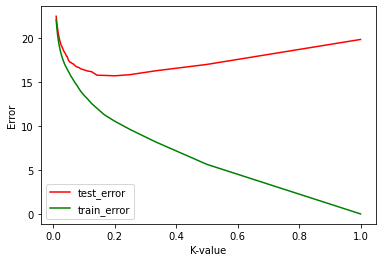

In [256]:
x_train,x_test,y_train,y_test = train_test_split(df[['AT','V','AP','RH']],df['EP'],test_size=0.3,train_size=0.7,
                                                random_state=1)
x_train.reset_index(inplace=True,drop=True)
x_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)
test_error = []
train_error = []
k = np.arange(1,101,1)
for a in k:
    knn = KNeighborsRegressor(n_neighbors=a)
    knn.fit(x_train, y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    test_score = mean_squared_error(y_test, y_pred_test)
    train_score = mean_squared_error(y_train, y_pred_train)
    #train_score = 1 - knn.score(x_train, y_train)
    #test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %a + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
for a in range(0,len(test_error),1):
    if test_error[a] == min(test_error):
        bestvalue_ka = k[a]   #the most suitable k among those values
        print('best k value: ', bestvalue_ka)
        print('best test error value: ', min(test_error))
k = np.linspace(k.min(), k.max(), 100)
k_new = np.reciprocal(k)
#test_error = np.array(test_error)
#train_error = np.array(train_error)
plt.plot(k_new, test_error, color = 'r',label = 'test_error')
plt.plot(k_new, train_error, color = 'g',label = 'train_error')
plt.legend()
plt.xlabel("K-value")
plt.ylabel("Error")

(i)KNN Regression normalized data

k: 1.000000  test_error: 0.000002  train_error: 0.000000
k: 2.000000  test_error: 0.000002  train_error: 0.000000
k: 3.000000  test_error: 0.000001  train_error: 0.000001
k: 4.000000  test_error: 0.000002  train_error: 0.000001
k: 5.000000  test_error: 0.000002  train_error: 0.000001
k: 6.000000  test_error: 0.000002  train_error: 0.000001
k: 7.000000  test_error: 0.000002  train_error: 0.000001
k: 8.000000  test_error: 0.000002  train_error: 0.000001
k: 9.000000  test_error: 0.000002  train_error: 0.000001
k: 10.000000  test_error: 0.000002  train_error: 0.000001
k: 11.000000  test_error: 0.000002  train_error: 0.000002
k: 12.000000  test_error: 0.000002  train_error: 0.000002
k: 13.000000  test_error: 0.000002  train_error: 0.000002
k: 14.000000  test_error: 0.000002  train_error: 0.000002
k: 15.000000  test_error: 0.000002  train_error: 0.000002
k: 16.000000  test_error: 0.000002  train_error: 0.000002
k: 17.000000  test_error: 0.000002  train_error: 0.000002
k: 18.000000  test_erro

Text(0, 0.5, 'Error')

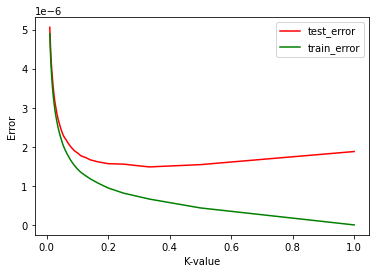

In [257]:
normdata = preprocessing.normalize(df)
df_norm = pd.DataFrame(normdata, columns=['AT', 'V', 'AP', 'RH', 'EP'])
x_train,x_test,y_train,y_test = train_test_split(df_norm[['AT','V','AP','RH']],df_norm['EP'],
                                                 test_size=0.3,train_size=0.7,random_state=1)
x_train.reset_index(inplace=True,drop=True)
x_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

test_error = []
train_error = []
k = np.arange(1,101,1)
for a in k:
    knn = KNeighborsRegressor(n_neighbors=a)
    knn.fit(x_train, y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    test_score = mean_squared_error(y_test, y_pred_test)
    train_score = mean_squared_error(y_train, y_pred_train)
    #train_score = 1 - knn.score(x_train, y_train)
    #test_score = 1 - knn.score(x_test, y_test)
    test_error.append(test_score)
    train_error.append(train_score)
    print('k: %f' %a + '  test_error: %f' %test_score + '  train_error: %f' %train_score)
for a in range(0,len(test_error),1):
    if test_error[a] == min(test_error):
        bestvalue_ka = k[a]   #the most suitable k among those values
        print('best k value: ', bestvalue_ka)
        print('best test error value: ', min(test_error))
k = np.linspace(k.min(), k.max(), 100)
k_new = np.reciprocal(k)
#test_error = np.array(test_error)
#train_error = np.array(train_error)
plt.plot(k_new, test_error, color = 'r',label = 'test_error')
plt.plot(k_new, train_error, color = 'g',label = 'train_error')
plt.legend()
plt.xlabel("K-value")
plt.ylabel("Error")

(j)Compare the results of KNN Regression with the linear regression model

The linear regression model has a minimum MSE error of approximately 20.78. 
The raw data KNN regression model has a MSE error of 15.7.
The normalized data KNN regression model has a MSE error of 1.484e-06. 
In conclusion, KNN regression model can have better result than that of linear regression model.

# 2. ISLR: 2.4.1

(a) Large dataset and small number of predictors mean less variance and 
    flexible model would be a better way to fit sample points.

(b) The variance would be large when the predictor is large and number of observation is large. 
    Therefore, inflexible model would be better.

(c) The relationship between predictor and response is highly non-linear 
    which means a flexible model is better to fit.

(d) Since the variance is very high which means the noise is high, the flexible model would be overfitting.
    Therefore, the infelxible model would be a good choice

# 3. ISLR: 2.4.7

(a)
obs.1 sqrt((0-0)*(0-0)+(3-0)*(3-0)+(0-0)*(0-0)) = 3
obs.2 sqrt((2-0)*(2-0)+(3-0)*(3-0)+(0-0)*(0-0)) = 2
obs.3 sqrt((0-0)*(0-0)+(1-0)*(1-0)+(3-0)*(3-0)) = 3.16
obs.4 sqrt((0-0)*(0-0)+(1-0)*(1-0)+(2-0)*(2-0)) = 2.24
obs.5 sqrt((-1-0)*(-1-0)+(0-0)*(0-0)+(1-0)*(1-0)) = 1.414
obs.6 sqrt((1-0)*(1-0)+(1-0)*(1-0)+(1-0)*(1-0)) = 1.732
Rank: 5 -> 6 -> 2 -> 4 -> 1 -> 3

(b)When K = 1, observation 5 is the closest number. Therefore, Green is the most suitable prediction.

(c)When K = 3, observation 5, 6, 2 are the closest numbers. Therefore, we should pick the most frequent color in this group which is Red.

(d) A small K would be a better way to do the Bayes decision boundary. Because large K creates larger variance.

Linear Regression: https://www.statsmodels.org/stable/regression.html
OLS: https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
trend line: https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas
coef and intercept: https://satishgunjal.com/univariate_lr_scikit/
annotate points: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
polynomial: https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features
train test and split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html